In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# re-size all the images 
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/train_tea'
valid_path = '/content/drive/MyDrive/test_tea'

In [ ]:
# Import the Resnet152V2 library

import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


234553344/234545216 [==============================] - 2s 0us/step


In [ ]:
# Not training the existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [ ]:
  #for getting number of output classes
folders = glob('/content/drive/MyDrive/train_tea/*')
folders

['/content/drive/MyDrive/train_tea/tea_leaf_blight',
 '/content/drive/MyDrive/train_tea/tea_red_leaf_spot',
 '/content/drive/MyDrive/train_tea/tea_red_scab',
 '/content/drive/MyDrive/train_tea/tea_healthy']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train_tea',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 364 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test_tea',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 156 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
12/12 [==============================] - 372s 30s/step - loss: 1.5874 - accuracy: 0.7082 - val_loss: 0.4830 - val_accuracy: 0.9295
Epoch 2/20
12/12 [==============================] - 229s 19s/step - loss: 0.0751 - accuracy: 0.9882 - val_loss: 0.4178 - val_accuracy: 0.9551
Epoch 3/20
12/12 [==============================] - 230s 19s/step - loss: 0.0308 - accuracy: 0.9928 - val_loss: 0.6058 - val_accuracy: 0.9487
Epoch 4/20
12/12 [==============================] - 228s 19s/step - loss: 0.1219 - accuracy: 0.9824 - val_loss: 0.6530 - val_accuracy: 0.9423
Epoch 5/20
12/12 [==============================] - 229s 19s/step - loss: 0.0466 - accuracy: 0.9840 - val_loss: 1.3120 - val_accuracy: 0.8910
Epoch 6/20
12/12 [==============================] - 229s 19s/step - loss: 0.0372 - accuracy: 0.9921 - val_loss: 1.0404 - val_accuracy: 0.9359
Epoch 7/20
12/12 [==============================] - 229s 19s/step - loss: 0.4539 - accuracy: 0.9784 - val_loss: 0.6726 - val_accuracy: 0.9295
Epoch 

In [ ]:
import matplotlib.pyplot as plt

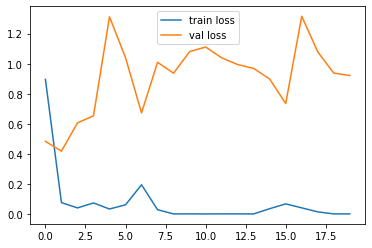

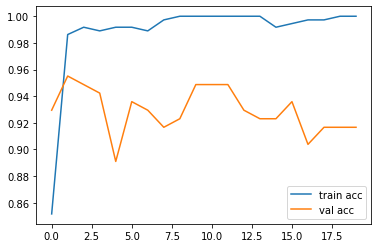

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')